In [17]:
# https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/text/transformer.ipynb
import numpy as np

def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    print(angle_rates) # broadcast
    return pos * angle_rates

def positional_encoding(position, d_model):
    print(f"position: {position}, dimension: {d_model}")
    print("===== position =====")
    print(np.arange(position)[:, np.newaxis]) # position 1차원 배열을 2차원의 행으로 만든다.
    print("\n===== dimension =====")
    print(np.arange(d_model)[np.newaxis, :]) # dimension 1차원 배열을 2차원의 열로 만든다.
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)

    # apply sin to even indices in the array; 2i
    sines = np.sin(angle_rads[:, 0::2])    
    # apply cos to odd indices in the array; 2i+1
    cosines = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = np.concatenate([sines, cosines], axis=-1)

    return pos_encoding
    
PE = positional_encoding(5, 6)
print()
print(PE.round(3))

position: 5, dimension: 6
===== position =====
[[0]
 [1]
 [2]
 [3]
 [4]]

===== dimension =====
[[0 1 2 3 4 5]]
[[1.         1.         0.04641589 0.04641589 0.00215443 0.00215443]]

[[ 0.     0.     0.     1.     1.     1.   ]
 [ 0.841  0.046  0.002  0.54   0.999  1.   ]
 [ 0.909  0.093  0.004 -0.416  0.996  1.   ]
 [ 0.141  0.139  0.006 -0.99   0.99   1.   ]
 [-0.757  0.185  0.009 -0.654  0.983  1.   ]]


거리, 벡터 크기, 내적

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

for i in range(PE.shape[0] - 1):
    d = euclidean_distances(PE[i].reshape(1,-1), PE[i+1].reshape(1,-1))
    norm = np.linalg.norm(PE[i])
    dot = np.dot(PE[i], PE[i+1])
    print("%d - %d : distance = %.4f, norm = %.4f, dot = %.4f" % (i, i+1, d[0,0], norm, dot))

3차원으로 그려 보자.

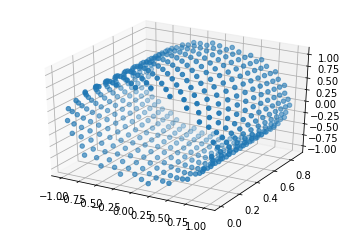

<Figure size 864x864 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

PE = positional_encoding(500, 3)
plt.figure(figsize=(12, 12))
ax.scatter(PE[:, 0], PE[:, 1], PE[:, 2], marker='o')
plt.show()